<a href="https://colab.research.google.com/github/ANIZAI/Machine-Learning-based-Anomaly-Detection/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


time (yyyy-MM-dd'T'HH:mm:ss.SSS)
2004-02-13 13:02:30    3.306531
2004-02-13 13:07:30    3.306531
2004-02-13 13:12:30    2.994446
2004-02-13 13:17:30    2.932029
2004-02-13 13:22:30    2.911223
Name: TCPV6T (C), dtype: float64


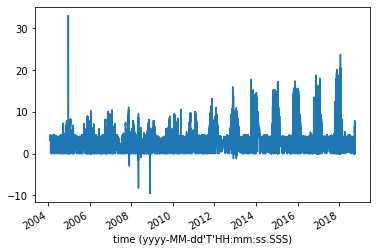

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

series = read_csv('BatteryTempCPV6Averaged.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


                               SARIMAX Results                                
Dep. Variable:             TCPV6T (C)   No. Observations:              1518180
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -328753.965
Date:                Thu, 20 May 2021   AIC                         657519.930
Time:                        15:34:43   BIC                         657593.328
Sample:                    02-29-2004   HQIC                        657539.797
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1566   6.09e-05   2573.164      0.000       0.156       0.157
ar.L2          0.0910   8.02e-05   1134.617      0.000       0.091       0.091
ar.L3          0.0538      0.000    494.173      0.0

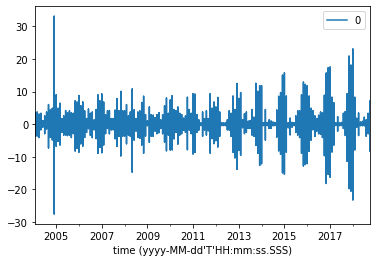

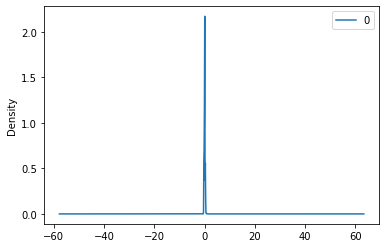

                  0
count  1.518180e+06
mean   5.042251e-07
std    3.004861e-01
min   -2.749984e+01
25%   -3.682844e-02
50%    0.000000e+00
75%    3.260972e-02
max    3.306738e+01


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
series = read_csv('BatteryTempCPV6Averaged.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
series = read_csv('BatteryTempCPV6Averaged.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=3.699120, expected=3.699120
predicted=3.699120, expected=3.459205
predicted=3.393405, expected=3.306531
predicted=3.230422, expected=3.306531
predicted=3.268207, expected=3.306531


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.304306, expected=3.524636
predicted=3.612687, expected=3.699120
predicted=3.792705, expected=4.068545


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4.209797, expected=4.089068
predicted=4.151898, expected=4.454932


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4.556765, expected=4.292955
predicted=4.272686, expected=4.089068
predicted=3.999200, expected=4.089068
predicted=4.034189, expected=4.089068
predicted=4.045616, expected=4.089068
predicted=4.111617, expected=3.924880
predicted=3.899355, expected=3.699120
predicted=3.613773, expected=3.699120


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.655587, expected=3.699120
predicted=3.689239, expected=3.699120
predicted=3.722637, expected=3.699120
predicted=3.720718, expected=3.699120
predicted=3.699120, expected=3.699120
predicted=3.699120, expected=3.699120
predicted=3.699120, expected=3.699120
predicted=3.699120, expected=3.699120
predicted=3.699120, expected=3.863309


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3.908339, expected=4.089068
predicted=4.174416, expected=4.435676
predicted=4.574271, expected=4.476454
predicted=4.546981, expected=4.476454
predicted=4.482646, expected=4.476454
predicted=4.445677, expected=4.089068
predicted=3.948253, expected=4.089068
predicted=4.029886, expected=4.089068
predicted=4.062368, expected=4.089068
predicted=4.102469, expected=4.089068
